In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
#df=pd.read_hdf("nsfg.hdf5","nsfg")
#print(df.head())

7.466407580919932 5.337450312322543
   bwt  gestation  parity  age  height  weight  smoke  bwt_lbs  height_ft  \
0  120        284       0   27      62     100      0   7.5000   5.166667   
1  113        282       0   33      64     135      0   7.0625   5.333333   
2  128        279       0   28      64     115      1   8.0000   5.333333   
3  108        282       0   23      67     125      1   6.7500   5.583333   
4  136        286       0   25      62      93      0   8.5000   5.166667   

   gestation_wks  PreTerm  
0      40.571429    False  
1      40.285714    False  
2      39.857143    False  
3      40.285714    False  
4      40.857143    False  


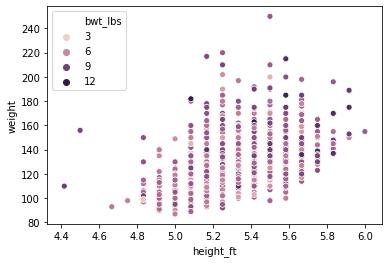

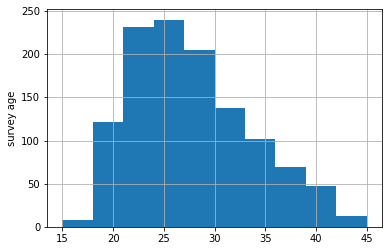

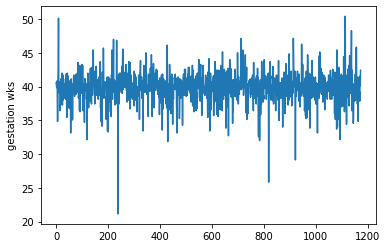

In [14]:
df=pd.read_csv("baby_birth_weight.csv")
df["bwt_lbs"]=df["bwt"]/16
avg=df["bwt_lbs"].mean()
df["height_ft"]=df["height"]/12
df["gestation_wks"]=df["gestation"]/7

df["PreTerm"]=df["gestation_wks"].apply(lambda x: True if x<37 else False)
height=df["height_ft"].mean()
print(avg,height)
print(df.head())
#df["height_ft"].plot()
sns.scatterplot(x="height_ft",y="weight",data=df,hue="bwt_lbs")
plt.show()

df["age"].hist()
plt.ylabel("survey age")
plt.show()
df["gestation_wks"].plot()
plt.ylabel("gestation wks")
plt.show()


3.4375     1
3.6250     1
3.8750     1
3.9375     1
4.0625     2
          ..
10.5625    1
10.6250    1
10.8125    1
10.8750    3
11.0000    1
Name: bwt_lbs, Length: 107, dtype: int64


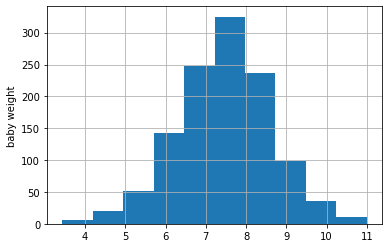

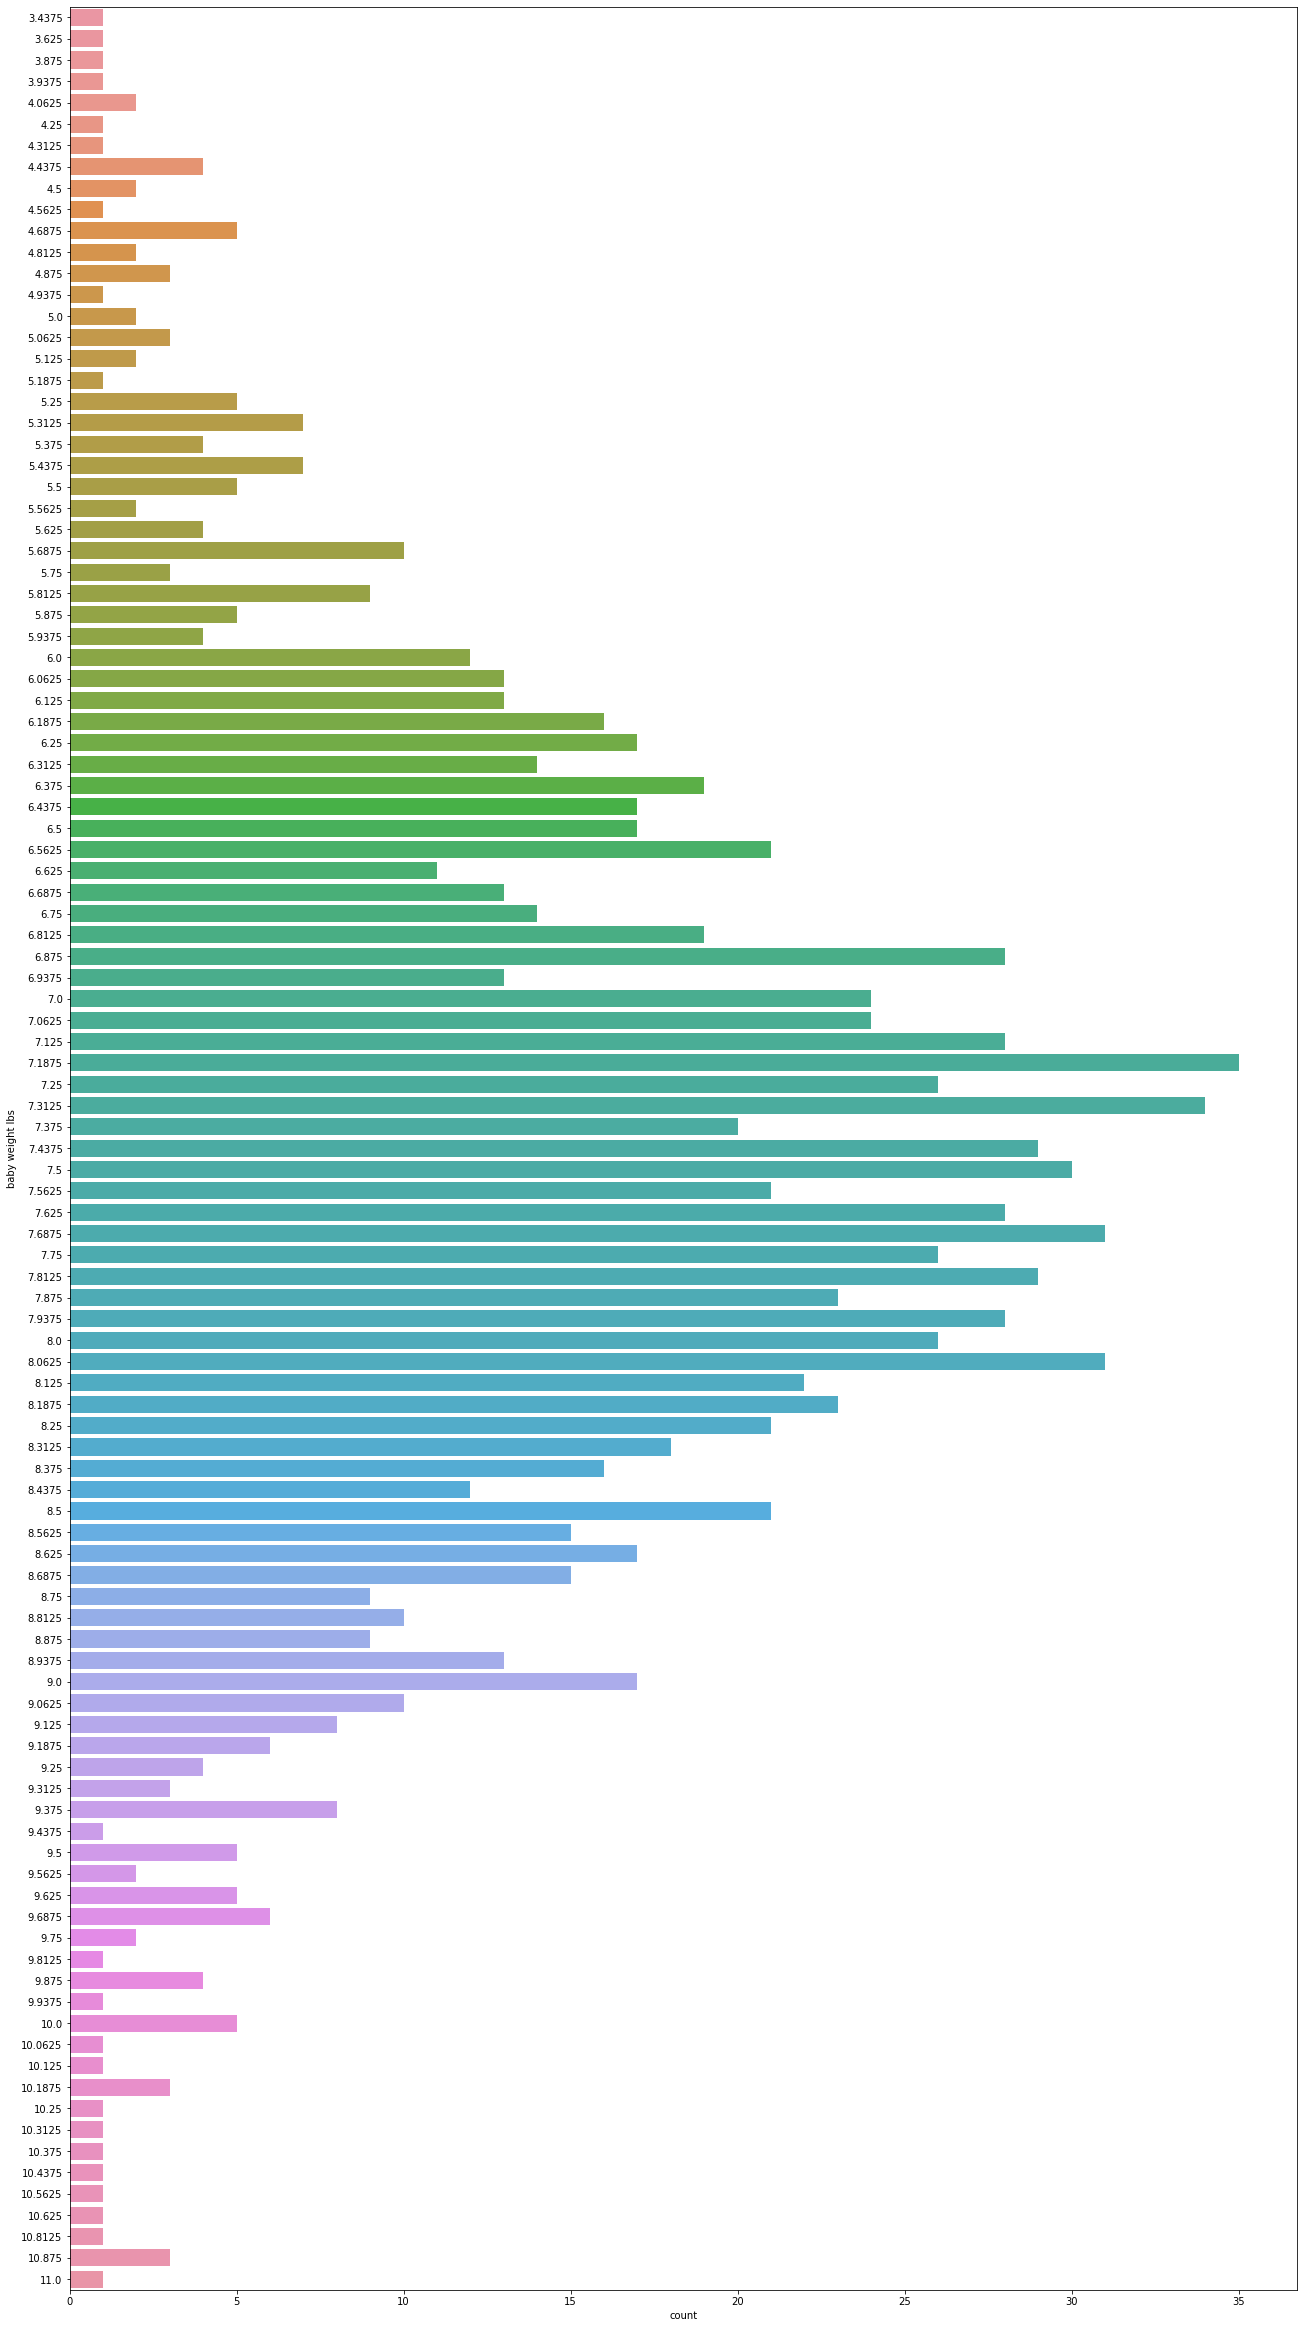

In [4]:
pounds=df["bwt_lbs"]
print(pounds.value_counts().sort_index())

pounds.hist()
plt.ylabel("baby weight")

plt.figure(figsize=(22,42))
sns.countplot(data=df, y="bwt_lbs")
plt.ylabel("baby weight lbs")
plt.show()

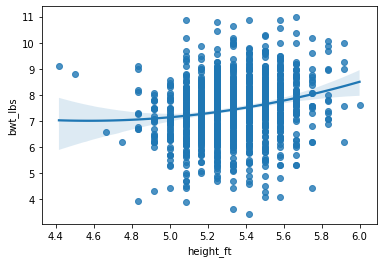

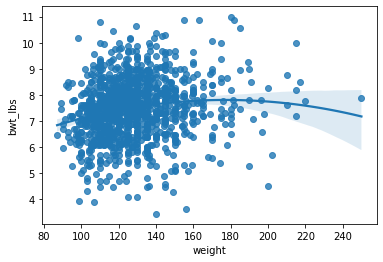

In [5]:
sns.regplot(data=df, y='bwt_lbs', x="height_ft", order=2)
plt.show()

sns.regplot(data=df, y='bwt_lbs', x="weight", order=2)
plt.show()


C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


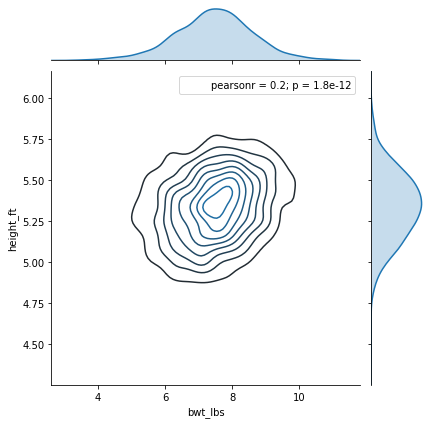

In [6]:
g=sns.JointGrid(data=df, x='bwt_lbs', y='height_ft')
g=g.plot_joint(sns.kdeplot)
g=g.plot_marginals(sns.kdeplot, shade=True)
g=g.annotate(stats.pearsonr)

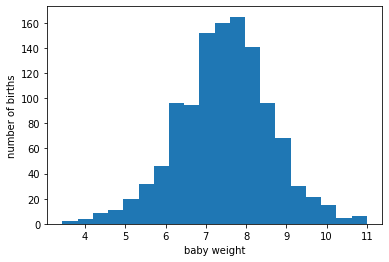

In [9]:
pounds=df["bwt_lbs"]

plt.hist(pounds.dropna(),bins=20)
plt.xlabel("baby weight")
plt.ylabel("number of births")
plt.show()


In [15]:
preterm = df["PreTerm"]

print("Count of PreTerm babies ", preterm.sum())
print("Percent of PreTerm babies ", df["PreTerm"].mean())

Count of PreTerm babies  96
Percent of PreTerm babies  0.0817717206132879


In [16]:
preterm_weight=pounds[preterm].mean()
print("Average PreTerm baby weight ", preterm_weight)

Average PreTerm baby weight  6.248697916666667
